## Part 0: Prerequisites

Importing packages and modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import os

In [2]:
os.makedirs("../images", exist_ok=True)

Loading data into dataframe

In [3]:
# Imports the data to a dataframe using absolute path
df = pd.read_csv('../data/raw/online_sales_data.csv').dropna()

## Part 1: Exploring the data

In [4]:
# Printing size of dataset
df.shape

(240, 9)

In [5]:
# Printing the top 5 rows
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [6]:
# Printing the column stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [7]:
# Printing basic statisitcs per column
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


## Part 2: Cleaning the data

In [8]:
# Seeing if data contains null values
df.isnull().sum()


Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [9]:
# Removing duplicates
df.drop_duplicates()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [10]:
# Converting the datatypes for the columns
df = df.astype({
    'Transaction ID': 'int64',
    'Product Category': 'category',
    'Product Name': 'category',
    'Units Sold': 'int64',
    'Unit Price': 'float64', 
    'Region': 'category',
    'Payment Method': 'category',
})

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category          category
Product Name              category
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                    category
Payment Method            category
dtype: object

In [11]:
# Checking for abnormal values
print(df[df['Units Sold'] < 0])
print(df[df['Total Revenue'] <= 0])


Empty DataFrame
Columns: [Transaction ID, Date, Product Category, Product Name, Units Sold, Unit Price, Total Revenue, Region, Payment Method]
Index: []
Empty DataFrame
Columns: [Transaction ID, Date, Product Category, Product Name, Units Sold, Unit Price, Total Revenue, Region, Payment Method]
Index: []


In [12]:
# Creating columns for later analysis
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['Month'] = df['Date'].dt.strftime('%b')  
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)
df['Year'] = df['Date'].dt.year

df.head()


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month,Year
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,Jan,2024
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,Jan,2024
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,Jan,2024
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,Jan,2024
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,Jan,2024


In [13]:
# Export and download cleaned csv file
os.makedirs("../data/cleaned", exist_ok=True)
df.to_csv("../data/cleaned/cleaned_sales_data.csv", index=False)

## Part 3: Analyzing the Data

Q1: What are the top-selling product categories?

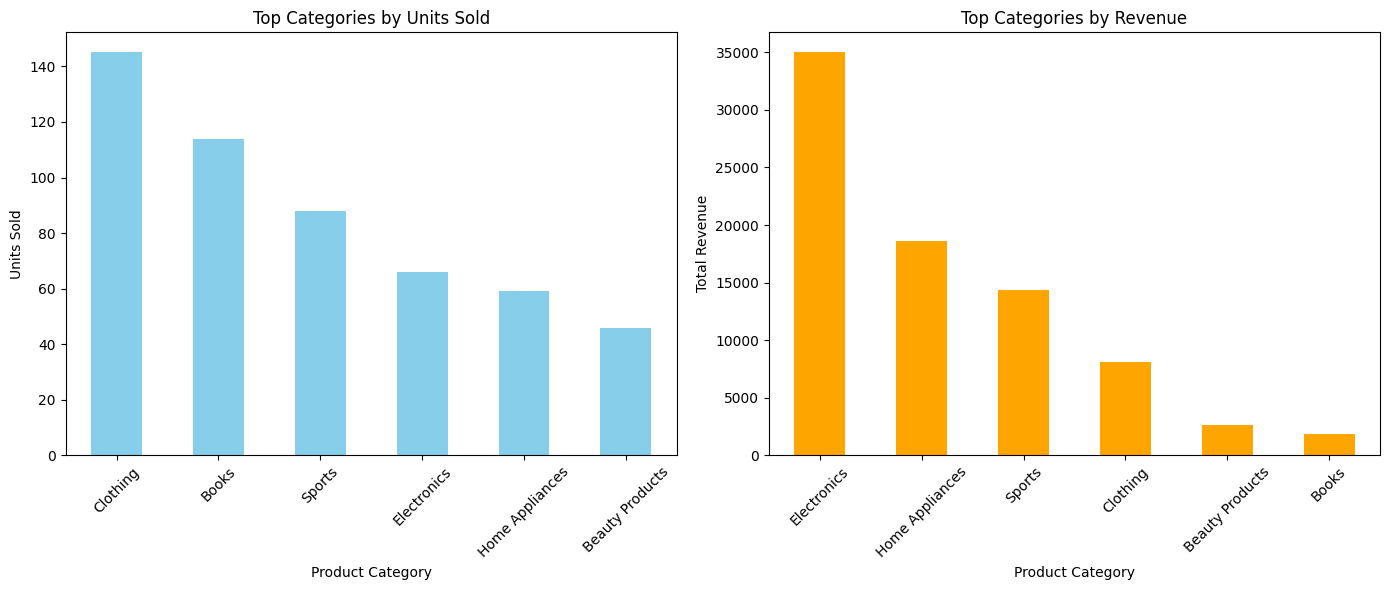

In [14]:
# Finding Top Categories/Products by total quantity of sales
revenue_by_category = df.groupby(['Product Category'], observed=True)['Total Revenue'].sum().sort_values(ascending=False)
units_by_category = df.groupby(['Product Category'], observed=True)['Units Sold'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot Units Sold
units_by_category.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top Categories by Units Sold')
axes[0].set_ylabel('Units Sold')
axes[0].set_xticklabels(units_by_category.index, rotation=45)

# Plot Revenue
revenue_by_category.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Top Categories by Revenue')
axes[1].set_ylabel('Total Revenue')
axes[1].set_xticklabels(revenue_by_category.index, rotation=45)

plt.tight_layout()

img_path = "../images/q1_visual.png"
if not os.path.exists(img_path):
    plt.savefig(img_path, dpi=300, bbox_inches='tight')

plt.show()

Q2: Which regions generate the most revenue?

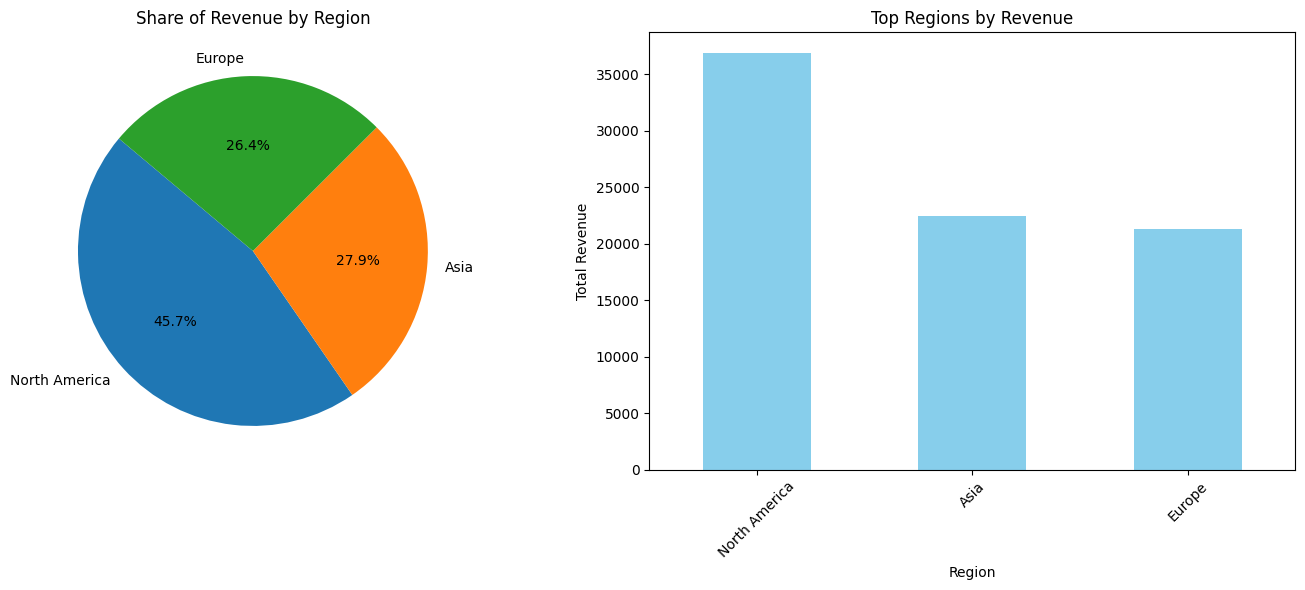

In [15]:
# Finding which regions generate the most revenue
revenue_by_region = df.groupby(['Region'], observed=True)['Total Revenue'].sum().sort_values(ascending=False)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot distrubution of sales by region
revenue_by_region.plot(
    kind='pie', 
    ax=axes[0],
    labels=revenue_by_region.index,
    autopct='%1.1f%%',
    startangle=140
)
axes[0].set_title('Share of Revenue by Region')
axes[0].set_ylabel('')  


# Compare revenue by regions
revenue_by_region.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Top Regions by Revenue')
axes[1].set_ylabel('Total Revenue')
axes[1].set_xticklabels(revenue_by_region.index, rotation=45)

plt.tight_layout()

img_path = "../images/q2_visual.png"
if not os.path.exists(img_path):
    plt.savefig(img_path, dpi=300, bbox_inches='tight')

plt.show()

Q3: Are there seasonal or monthly trends in sales or quantity sold?

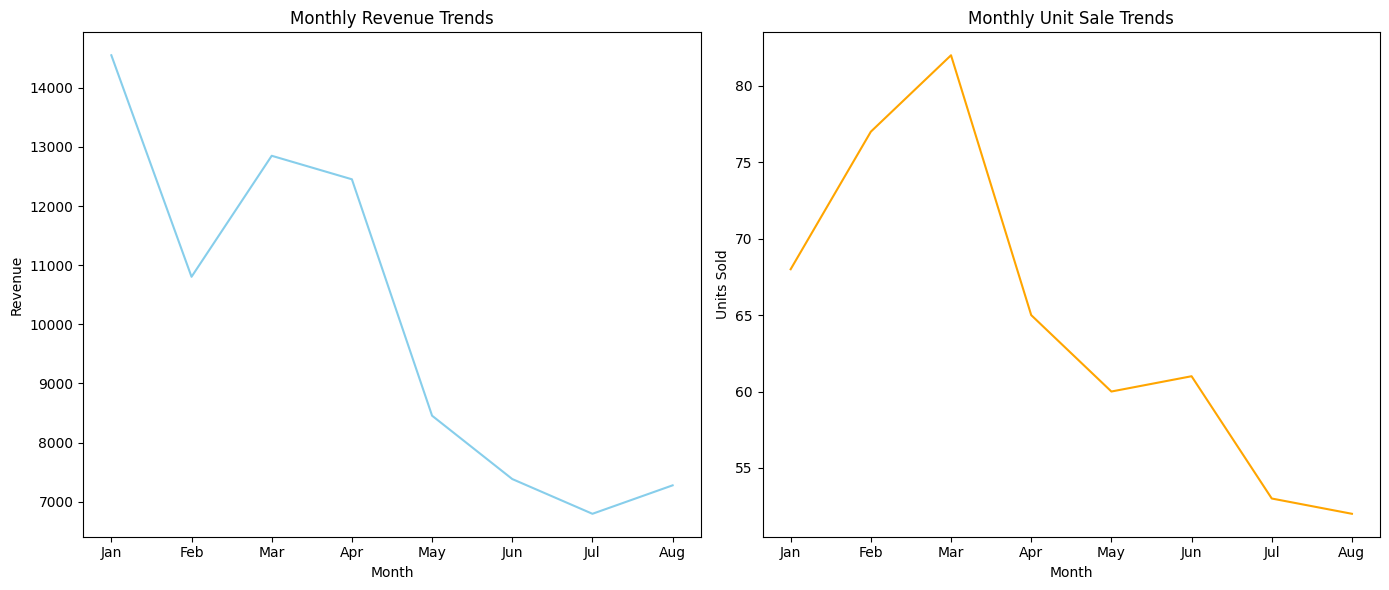

In [16]:
# Finding monthly trends in revenue and units sold
revenue_by_month = df.groupby(['Month'], observed=True)['Total Revenue'].sum()
units_by_month = df.groupby(['Month'], observed=True)['Units Sold'].sum()

# Filtering out data moths with no sales / units sold
revenue_by_month = revenue_by_month[revenue_by_month > 0]
units_by_month = units_by_month[units_by_month > 0]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot line graph for revenue trends
revenue_by_month.plot(kind='line', title="Monthly Revenue Trends", color='skyblue', ax=axes[0])
axes[0].set_ylabel('Revenue')  


# Plot line graph for unit sale trends
units_by_month.plot(kind='line', title="Monthly Unit Sale Trends", color='orange', ax=axes[1])
axes[1].set_ylabel('Units Sold')  

plt.tight_layout()

img_path = "../images/q3_visual.png"
if not os.path.exists(img_path):
    plt.savefig(img_path, dpi=300, bbox_inches='tight')

plt.show()

Q4: Which products are most popular in each region?

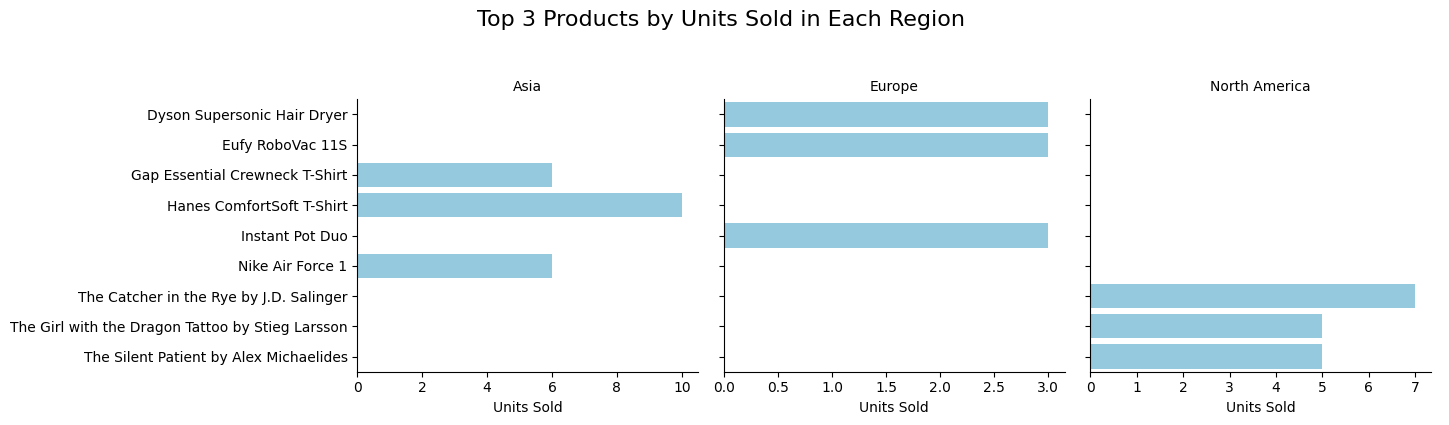

In [17]:
# Finding which products are most popular in each region

# Finding top products based on units sold
product_region_sales = df.groupby(['Region', 'Product Name'], observed=True)['Units Sold'].sum().reset_index()
product_region_sales = product_region_sales.sort_values(['Region', 'Units Sold'], ascending=[True, False])
top_products_per_region = product_region_sales.groupby(['Region'], observed=True).head(3).reset_index()
top_products_per_region['Product Name'] = top_products_per_region['Product Name'].cat.remove_unused_categories()

graph = sns.catplot(
    data=top_products_per_region,
    x='Units Sold',
    y='Product Name',
    col='Region',
    kind='bar',
    sharex=False,
    height=4,
    aspect=1.2,
    color="skyblue",
)


graph.set_titles("{col_name}") 
graph.figure.suptitle("Top 3 Products by Units Sold in Each Region", fontsize=16, y=1.05)
graph.set_axis_labels("Units Sold", "")
plt.tight_layout()

img_path = "../images/q4_visual.png"
if not os.path.exists(img_path):
    plt.savefig(img_path, dpi=300, bbox_inches='tight')

plt.show()

Q5: How do payment methods impact sales volume or revenue?

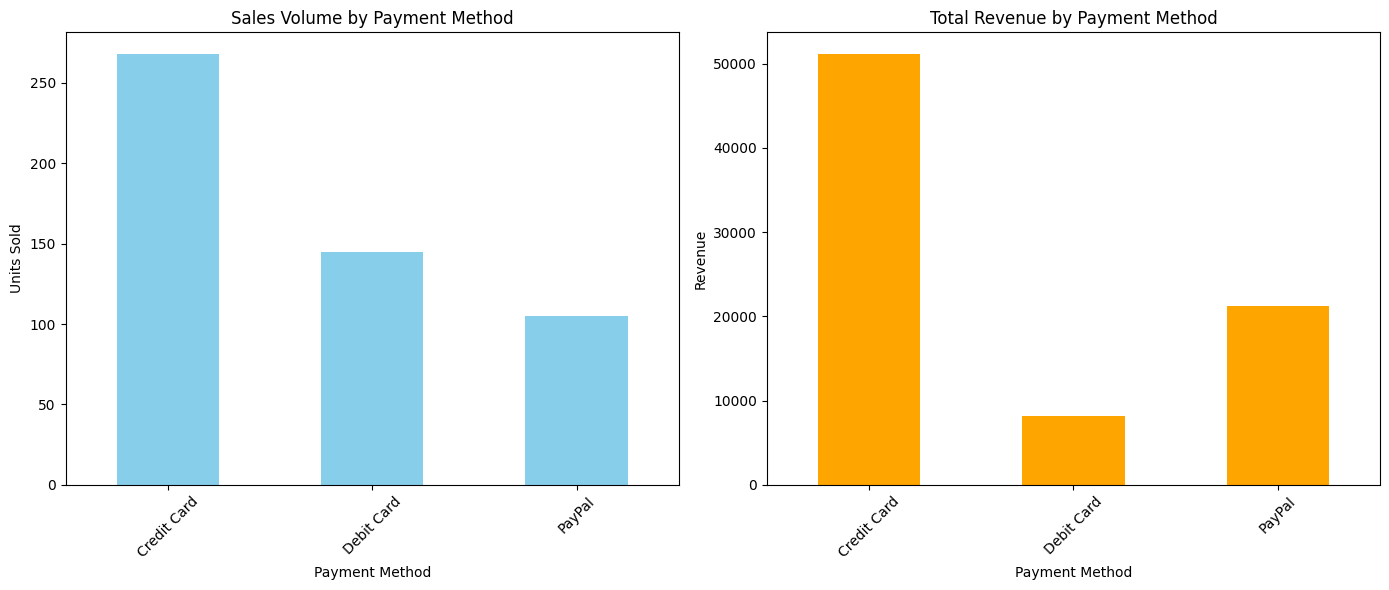

In [18]:
# Seeing if different payment methods affect sales volume or revenue
volume_by_method = df.groupby(['Payment Method'], observed=True)['Units Sold'].sum()
revenue_by_method = df.groupby(['Payment Method'], observed=True)['Total Revenue'].sum()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

# Plot sales volume by payment method
volume_by_method.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Sales Volume by Payment Method')
axes[0].set_ylabel('Units Sold')
axes[0].set_xticklabels(volume_by_method.index, rotation=45)

# Plot total revenue by paymenth method
revenue_by_method.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Total Revenue by Payment Method')
axes[1].set_ylabel('Revenue')
axes[1].set_xticklabels(revenue_by_method.index, rotation=45)


plt.tight_layout()

img_path = "../images/q5_visual.png"
if not os.path.exists(img_path):
    plt.savefig(img_path, dpi=300, bbox_inches='tight')

plt.show()

Q6: Which products generate the most revenue per transaction?

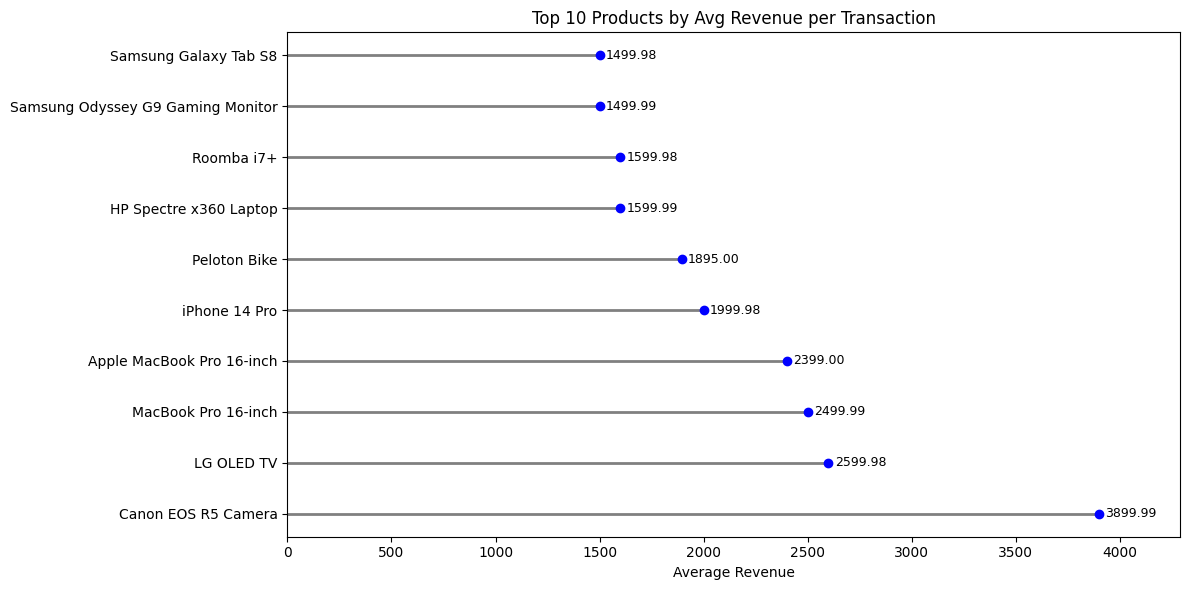

In [19]:
# Finding out which products generate the most revenue per transaction
product_transaction_sales = df.groupby(['Product Name', 'Transaction ID'], observed=True)['Total Revenue'].sum().reset_index()
avg_sales_per_transaction = product_transaction_sales.groupby('Product Name', observed=True)['Total Revenue'].mean()

# Sorting by desc to get top 10 prods
top_products = avg_sales_per_transaction.sort_values(ascending=False).head(10).reset_index()

# Plotting using "lolipop" style graph
plt.figure(figsize=(12, 6))
y = top_products['Product Name']
x = top_products['Total Revenue']
plt.hlines(y=y, xmin=0, xmax=x, color='gray', linewidth=2)
plt.plot(x, y, 'o', color='blue')

for i, (val, name) in enumerate(zip(x, y)):
    plt.text(val + 30, i, f'{val:.2f}', va='center', ha='left', fontsize=9)

plt.xlim(0, max(x) * 1.1)
plt.title('Top 10 Products by Avg Revenue per Transaction')
plt.xlabel('Average Revenue')
plt.tight_layout()

img_path = "../images/q6_visual.png"
if not os.path.exists(img_path):
    plt.savefig(img_path, dpi=300, bbox_inches='tight')

plt.show()


Q7: Which products should the company market during specific season?

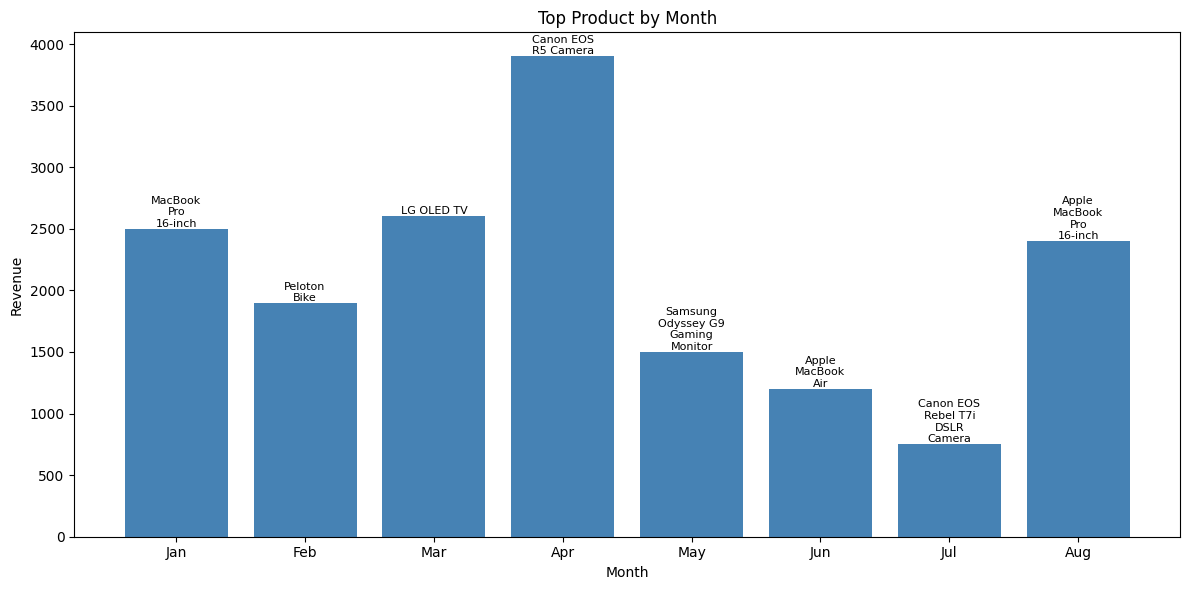

In [20]:
# Finding monthly trends in revenue and units sold
monthly_product_revenue = df.groupby(['Product Name','Month'], observed=True)['Total Revenue'].sum().reset_index()


top_product_per_month = (
    monthly_product_revenue.sort_values(['Month', 'Total Revenue'], ascending=[True, False])
    .drop_duplicates(subset='Month')
    .sort_values('Month')
)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_product_per_month['Month'], top_product_per_month['Total Revenue'], color='steelblue')

# Label each bar with product name
for bar, label in zip(bars, top_product_per_month['Product Name']):
    wrapped = '\n'.join(textwrap.wrap(label, width=10))
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, wrapped,
             ha='center', va='bottom', fontsize=8)

plt.title('Top Product by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()

img_path = "../images/q7_visual.png"
if not os.path.exists(img_path):
    plt.savefig(img_path, dpi=300, bbox_inches='tight')

plt.show()